# Regression: California Housing Dataset.

***Stephen Sani***

>***To train regression model that predict median house value.***

The following packages are required:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from ml_util import SplitData, ReadData, CleanText, DropMissing, CreateFeatures, FillMissing, \
    EncodeCategory, SeperateLabel, ScaleFeatures, train_error, cv_error, plot_learning_curves
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, learning_curve
from joblib import dump, load

Entire range of tasks required to clean and use the dataset are implemented in pipelines. :
1. Read dataset
2. Clean/harmonize text fields
3. Drop rows with missing values in text fields
4. Seperate label
5. Split dataset into train and test sets
6. Fill missing numeric values in training set
7. Encode ocean_proximity
8. Create new features: ['rooms_per_bedrooms', 'population_per_households', 'median_income_per_households', 'population_per_total_rooms']

Instantiate pipelines for task execution

In [37]:
# Pipeline to get housing data
read_data = Pipeline([
    ('read_data', ReadData()),
    ('clean_text', CleanText()),
    ('drop_missing', DropMissing(columns=['ocean_proximity'])),
])

# Pipeline to seperate label
seperate_label = Pipeline([
    ('seperate_label', SeperateLabel(label=['median_house_value'])),
])

# Pipeline to split data set
split_data = Pipeline([
    ('split_data', SplitData(strat=True, cat=['ocean_proximity'])),
])

# Pipeline to fill missing numeric values
fill_missing = Pipeline([
    ('fill_missing', FillMissing(strategy='median')),
])

# Pipeline to procees features
process_features = Pipeline([
    ('encode_category', EncodeCategory(feature='ocean_proximity', one_hot=False)),
    ('create_features', CreateFeatures()),
])


Execute pipeline stages to obtain training and test sets

In [38]:
# Read housing data
housing = read_data.fit_transform('./resources/data/housing_ready.csv')

# Seperate housing data label
X, y = seperate_label.fit_transform(housing)

# Split housing data into training and test sets
train_x, test_x, train_y, test_y = split_data.fit_transform(X, y)

# Fill missing numeric values in training and test sets
train_x_filled = fill_missing.fit_transform(train_x)
test_x_filled = fill_missing.transform(test_x)

# Process features in training and test sets
train_X = process_features.fit_transform(X=train_x_filled)
test_X = process_features.transform(X=test_x_filled)

# Reshape outcome for training and test sets
train_y = train_y.to_numpy().ravel()
test_y = test_y.to_numpy().ravel()

## Model selection

Train and evaluate several regression models for selection.

#### 1. Stochastic Gradient Descent Regression

In [39]:
# Stochastic gradient descent regression model
sgd_regr = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('sgd_regr', SGDRegressor(max_iter=4000)),
])
sgd_regr.fit(X=train_X, y=train_y)
dump(sgd_regr, './resources/models/sgd_regr.joblib') 
train_y_pred = sgd_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
sgd_regr_tre = train_error(train_y, train_y_pred)
sgd_regr_cve = cv_error(sgd_regr, train_X, train_y)

#### 2. Linear Regression

In [40]:
# Linear regression
lin_regr = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('lin_regr', LinearRegression()),
])
lin_regr.fit(X=train_X, y=train_y)
dump(lin_regr, './resources/models/lin_regr.joblib') 
train_y_pred = lin_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
lin_regr_tre = train_error(train_y, train_y_pred)
lin_regr_cve = cv_error(lin_regr, train_X, train_y)

#### 3. Polynomial Regression

In [41]:
# Polynomial regression (non-linear regression)
poly_lin_regr = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scale_features', ScaleFeatures()),
    ('poly_lin_regr', LinearRegression()),
])

poly_lin_regr.fit(X=train_X, y=train_y)
dump(lin_regr, './resources/models/poly_lin_regr.joblib') 
train_y_pred = poly_lin_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
poly_lin_regr_tre = train_error(train_y, train_y_pred)
poly_lin_regr_cve = cv_error(poly_lin_regr, train_X, train_y)

#### 4. Ridge Regression

In [42]:
# Ridge regression
ridge_regr = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('ridge_regr', Ridge(max_iter=4000)),
])
ridge_regr.fit(X=train_X, y=train_y)
dump(ridge_regr, './resources/models/ridge_regr.joblib') 
train_y_pred = ridge_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
ridge_regr_tre = train_error(train_y, train_y_pred)
ridge_regr_cve = cv_error(ridge_regr, train_X, train_y)

#### 5. Lasso Regression

In [43]:
# Lasso regression
lasso_regr = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('lasso_regr', Lasso(max_iter=4000, tol=0.01)),
])
hist =lasso_regr.fit(X=train_X, y=train_y)
dump(lasso_regr, './resources/models/lasso_regr.joblib') 
train_y_pred = lasso_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
lasso_regr_tre = train_error(train_y, train_y_pred)
lasso_regr_cve = cv_error(lasso_regr, train_X, train_y)

#### 6. ElasticNet Regression

In [44]:
# ElasticNet regression (linear regression with l1 and l2 regularization)
elast_regr = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('elast_regr', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=4000, tol=0.01)),
])

elast_regr.fit(X=train_X, y=train_y)
dump(elast_regr, './resources/models/elast_regr.joblib') 
train_y_pred = elast_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
elast_regr_tre = train_error(train_y, train_y_pred)
elast_regr_cve = cv_error(elast_regr, train_X, train_y)

#### 7. DescisionTree Regression

In [45]:
# Decision Tree Regression
tree_regr = Pipeline([
    ('tree_regr', DecisionTreeRegressor()),
])
tree_regr.fit(X=train_X, y=train_y) 
dump(tree_regr, './resources/models/tree_regr.joblib') 
train_y_pred = tree_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
tree_regr_tre = train_error(train_y, train_y_pred)
tree_regr_cve = cv_error(tree_regr, train_X, train_y)

#### 8. Random Forest Regression

In [46]:
# Random Forest Regression
forest_regr = Pipeline([
    ('forest_regr', RandomForestRegressor()),
])
forest_regr.fit(X=train_X, y=train_y) 
dump(forest_regr, './resources/models/forest_regr.joblib') 
train_y_pred = forest_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
forest_regr_tre = train_error(train_y, train_y_pred)
forest_regr_cve = cv_error(forest_regr, train_X, train_y)

#### 9. Support Vector Machine Regression

In [47]:
# Support Vector Machine Regression 
svm_regr = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('svm_regr', svm.NuSVR()),
])
svm_regr.fit(X=train_X, y=train_y) 
dump(svm_regr, './resources/models/svm_regr.joblib') 
train_y_pred = svm_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
svm_regr_tre = train_error(train_y, train_y_pred)
svm_regr_cve = cv_error(svm_regr, train_X, train_y)

#### 10. Multi Layer Perceptron Regression

In [48]:
# Multiple Layer Perceptron
mlp_regr = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('mlp_regr', MLPRegressor(activation='tanh', hidden_layer_sizes=(7), solver='lbfgs', max_iter=4000, random_state=42)),
])
mlp_regr.fit(X=train_X, y=train_y) 
dump(mlp_regr, './resources/models/mlp_regr.joblib')
train_y_pred = mlp_regr.predict(X=train_X)

# Training and cross-validation errors (rmse)
mlp_regr_tre = train_error(train_y, train_y_pred)
mlp_regr_cve = cv_error(mlp_regr, train_X, train_y)

### Results

A summary of the results

In [49]:
results = {
    'sgd_regr': [sgd_regr_tre['Training_error'], sgd_regr_cve['Mean']],
    'lin_regr': [lin_regr_tre['Training_error'], lin_regr_cve['Mean']],
    'poly_lin_regr': [poly_lin_regr_tre['Training_error'], poly_lin_regr_cve['Mean']],
    'ridge_regr': [ridge_regr_tre['Training_error'], ridge_regr_cve['Mean']],
    'lasso_regr': [lasso_regr_tre['Training_error'], lasso_regr_cve['Mean']],
    'elast_regr': [elast_regr_tre['Training_error'], elast_regr_cve['Mean']],
    'tree_regr': [tree_regr_tre['Training_error'], tree_regr_cve['Mean']],
    'forest_regr': [forest_regr_tre['Training_error'], forest_regr_cve['Mean']],
    'svm_regr': [svm_regr_tre['Training_error'], svm_regr_cve['Mean']],
    'mlp_regr': [mlp_regr_tre['Training_error'], mlp_regr_cve['Mean']],
}
results

{'sgd_regr': [72218380367.52135, 65765742643.53943],
 'lin_regr': [56611.97440930865, 56907.67656047384],
 'poly_lin_regr': [50779.72222203578, 2943891.45802177],
 'ridge_regr': [56611.97960918478, 56905.025837592475],
 'lasso_regr': [56611.97621912849, 56905.19491734043],
 'elast_regr': [57277.621703349774, 57383.160581887045],
 'tree_regr': [0.0, 60481.05790401982],
 'forest_regr': [15994.665347534872, 43380.61230567224],
 'svm_regr': [95131.4791391978, 95179.79989238977],
 'mlp_regr': [74247.82308605181, 83606.17879501887]}

From the results: 
1. sgd_regr has very high training error indicating high bias (underfitting).
2. lin_regr and poly_lin_reger have better training errors compared to sgd_regr In addition, they both have low variance and can generalize to the validation set although they do not use regularization.
3. ridge_regr, lasso_regr, elast_regr also have promising results as the variance is low. The training error is also similar to that of lin_regr and poly_lin_reger. The hyperparameters can be tunned to improve prformance
4. tree_regr and forest_regr have superior training errors but have high variance. To address overfitting, reduce the number of features or simplify the model or increase training sample.
5. svm_regr and mlp_regr have relatively high training errors although the variance is small.

Proceeding with lasso_regr: 
1. lasso_regr and elast_reger can minimize the weight of useless features which will be useful in feature selection for further action
2. In addition to the low training error, the cross-validation score is very close compared with the training error indicating that the model does not overfit the training set and can generalize to new samples.


## Hyper Parameter Tunning

To get the best performance from the selected model, we tune some hyperparameters to optimize performance

In [50]:
# Fine tunning with GridSearchCV

lasso_regr = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('lasso_regr', Lasso(max_iter=4000, tol=0.01)),
])

param_grid = [
    {
        'alpha': [40, 60, 80],
        'tol': [1e-2, 1e-1, 1]
    }
]

grid_search = GridSearchCV(
    estimator=lasso_regr.named_steps['lasso_regr'], param_grid=param_grid, cv=5, 
    scoring='neg_mean_squared_error', return_train_score=True
)

grid_search.fit(X=train_X, y=train_y)

GridSearchCV(cv=5, estimator=Lasso(max_iter=4000, tol=0.01),
             param_grid=[{'alpha': [40, 60, 80], 'tol': [0.01, 0.1, 1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Display results

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

57857.19392887427 {'alpha': 40, 'tol': 0.01}
57836.67839482369 {'alpha': 40, 'tol': 0.1}
58041.99301552066 {'alpha': 40, 'tol': 1}
57092.233661725004 {'alpha': 60, 'tol': 0.01}
57077.896852897 {'alpha': 60, 'tol': 0.1}
58076.18956475679 {'alpha': 60, 'tol': 1}
57235.45857602866 {'alpha': 80, 'tol': 0.01}
57212.92194056179 {'alpha': 80, 'tol': 0.1}
58105.03559226114 {'alpha': 80, 'tol': 1}


Obtain the best hyperparameter values

In [52]:
grid_search.best_params_

{'alpha': 60, 'tol': 0.1}

Obtain the best estimator

In [53]:
grid_search.best_estimator_

Lasso(alpha=60, max_iter=4000, tol=0.1)

#### Learning curve

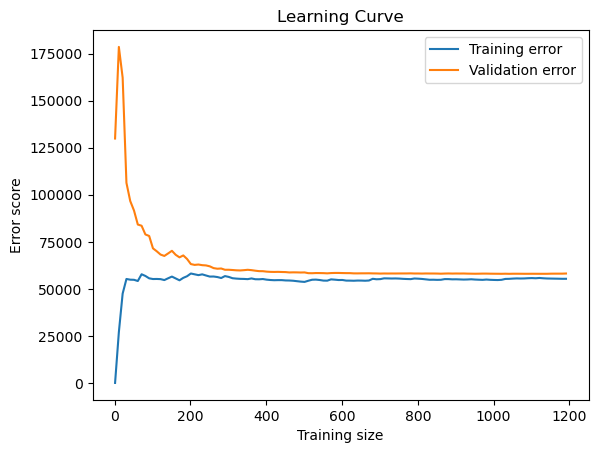

In [54]:
lasso_regr = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('lasso_regr', grid_search.best_estimator_),
])

train_size, train_err, valid_err = learning_curve(
    lasso_regr, train_X, train_y, n_jobs=5,
    scoring="neg_mean_squared_error", train_sizes=np.arange(1, 1200, 10)
)

plt.figure()
plt.plot(train_size, np.sqrt(-train_err.mean(axis=1)), label='Training error')
plt.plot(train_size, np.sqrt(-valid_err.mean(axis=1)), label='Validation error')
plt.ylabel('Error score')
plt.xlabel('Training size')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Final Model Training

Train the best estimator tunned to the validation set

In [55]:
# Final model
final_model = Pipeline([
    ('scale_features', ScaleFeatures()),
    ('final_model', grid_search.best_estimator_),
])

final_model.fit(X=train_X, y=train_y) 
dump(final_model, './resources/models/final_model.joblib')

train_y_pred = final_model.predict(X=train_X)

# Training and cross-validation errors
print(train_error(train_y, train_y_pred))
print(cv_error(final_model, train_X, train_y))

# R squared (Goodness of fit on the training set)
r2 = r2_score(train_y, train_y_pred)
print({'R squared': r2})

{'Training_error': 56641.81107269637}
{'Validation_errors': array([56197.32379821, 56768.53085635, 55630.73030343, 59009.92929655,
       56599.11783914]), 'Mean': 56841.126418733606, 'Standard deviation': 1153.003448497509}
{'R squared': 0.6436913977844123}


Obtain the coefficients of the model

In [56]:
weights = final_model.named_steps['final_model'].coef_
create_features_stage_output = process_features.named_steps['create_features'].transform(
    process_features.named_steps['encode_category'].transform(X=train_x)
)
pd.Series(data=weights, index=create_features_stage_output.columns)

longitude                        -40877.136174
latitude                         -39176.393263
housing_median_age                 9619.979761
total_rooms                        4988.418731
total_bedrooms                    10568.519160
population                       -33953.390362
households                        22640.793392
median_income                     67878.682517
ocean_proximity                  -17148.528710
population_per_households             0.000000
population_per_total_rooms          -54.017155
median_income_per_households      -3659.317505
total_bedrooms_per_total_rooms    13803.766302
dtype: float64

Obtain the intercept of the model

In [57]:
final_model.named_steps['final_model'].intercept_

188377.03525618988

Show feature importances

In [58]:
pd.Series(data=weights, index=create_features_stage_output.columns).abs().sort_values(ascending=False)

median_income                     67878.682517
longitude                         40877.136174
latitude                          39176.393263
population                        33953.390362
households                        22640.793392
ocean_proximity                   17148.528710
total_bedrooms_per_total_rooms    13803.766302
total_bedrooms                    10568.519160
housing_median_age                 9619.979761
total_rooms                        4988.418731
median_income_per_households       3659.317505
population_per_total_rooms           54.017155
population_per_households             0.000000
dtype: float64

The feature population_per_households have a weight of 0.0 meaning it is not useful for predicting median hous value.

The top 5 features are:

In [59]:
pd.Series(data=weights, index=create_features_stage_output.columns).abs().sort_values(ascending=False).head(5)

median_income    67878.682517
longitude        40877.136174
latitude         39176.393263
population       33953.390362
households       22640.793392
dtype: float64

## Final Model Evaluation

Test the perfomance of the best estimator on the test set

In [60]:
# Test set prediction and evaluation
test_y_predictions = final_model.predict(test_X)
# Test error
test_mse = mean_squared_error(test_y, test_y_predictions)
test_rmse = np.sqrt(test_mse)
print('Test set error (rmse): ', test_rmse)
# R squared (Goodness of fit)
r2 = r2_score(test_y, test_y_predictions)
print({'R Squared': r2})

Test set error (rmse):  54444.65837553601
{'R Squared': 0.6604917811410894}


The final model generalized to the test set as expected and accounted for about 66% of the variation in the test set

Compute the 95% confidence interval for the test set error

In [61]:
# error as an interval of 95% confidene level
confidence = 0.95
squared_errors = (test_y_predictions-test_y) ** 2
np.sqrt(stats.t.interval(
    confidence, 
    len(squared_errors) - 1, 
    loc=squared_errors.mean(), 
    scale=stats.sem(squared_errors)
))


array([52590.5419273 , 56237.67910441])

## Prediction

Predict some median_house_value given some data in a .csv file

In [62]:
# Read prediction data
predict_set = read_data.transform('./resources/data/predict.csv')

# Fill missing numeric values in training and test sets
X_filled = fill_missing.transform(X)

# Process features in training and test sets
prepared_X = process_features.transform(X=X_filled)

# Reshape outcome for training and test sets
prepared_y = y.to_numpy().ravel()

# Predict median house value
predictions = final_model.predict(prepared_X)
print(predictions)

[386473.93347458 411852.25702194 169789.14704045 ... 269154.79755453
 241667.7049415  213834.59457891]
